In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "four_square.csv"
four_square_df = pd.read_csv(file_path)

# Remove the specified columns
columns_to_remove = ['venue_id', 'venue_latitude', 'venue_longitude']
four_square_df.drop(columns=columns_to_remove, inplace=True)

# Save the modified DataFrame to a new CSV file
modified_file_path = "four_square_modified.csv"
four_square_df.to_csv(modified_file_path, index=False)

# Display the first few rows of the modified DataFrame to confirm
four_square_df.head()


,station_name,latitude,longitude,venue_name,venue_category,venue_address,venue_distance
0,10th & Cambie,49.262487,-123.114397,Winona Park,Landmarks and Outdoors,400 W 59th Ave,105
1,10th & Cambie,49.262487,-123.114397,Whole Foods,Retail,510 8th Ave W,173
2,10th & Cambie,49.262487,-123.114397,La Taqueria Pinche Taco Shop,Taco Restaurant,2450 Yukon St,183
3,10th & Cambie,49.262487,-123.114397,Elysian Coffee Broadway,Coffee Shop,590 Broadway W,216
4,10th & Cambie,49.262487,-123.114397,Cactus Club Cafe Broadway + Ash,American Restaurant,575 West Broadway,226


In [6]:
# Load the CSV file into a DataFrame
file_path = "four_square.csv"
four_square_df = pd.read_csv(file_path)

# Remove the specified columns
columns_to_remove = ['venue_id', 'venue_latitude', 'venue_longitude']
four_square_df.drop(columns=columns_to_remove, inplace=True)

# Rename 'venue_name' to 'business_name' and 'venue_category' to 'categories'
four_square_df.rename(columns={'venue_name': 'business_name', 'venue_category': 'categories'}, inplace=True)

# Add new columns 'review_count', 'rating', 'price', and 'phone' with None values
four_square_df.insert(four_square_df.columns.get_loc('business_name') + 1, 'review_count', None)
four_square_df.insert(four_square_df.columns.get_loc('review_count') + 1, 'rating', None)
four_square_df.insert(four_square_df.columns.get_loc('categories') + 1, 'price', None)
four_square_df.insert(four_square_df.columns.get_loc('price') + 1, 'phone', None)

# Move 'venue_distance' next to 'phone' and rename it to 'distance'
distance_column = four_square_df.pop('venue_distance')
four_square_df.insert(four_square_df.columns.get_loc('phone') + 1, 'distance', distance_column)

# Rename 'venue_address' to 'address' and move it to the end
address_column = four_square_df.pop('venue_address')
four_square_df['address'] = address_column

# Save the modified DataFrame to a new CSV file
modified_file_path = "four_square_modified.csv"
four_square_df.to_csv(modified_file_path, index=False)


# Display the first few rows of the modified DataFrame to confirm
four_square_df.head()


,station_name,latitude,longitude,business_name,review_count,rating,categories,price,phone,distance,address
0,10th & Cambie,49.262487,-123.114397,Winona Park,None,None,Landmarks and Outdoors,None,None,105,400 W 59th Ave
1,10th & Cambie,49.262487,-123.114397,Whole Foods,None,None,Retail,None,None,173,510 8th Ave W
2,10th & Cambie,49.262487,-123.114397,La Taqueria Pinche Taco Shop,None,None,Taco Restaurant,None,None,183,2450 Yukon St
3,10th & Cambie,49.262487,-123.114397,Elysian Coffee Broadway,None,None,Coffee Shop,None,None,216,590 Broadway W
4,10th & Cambie,49.262487,-123.114397,Cactus Club Cafe Broadway + Ash,None,None,American Restaurant,None,None,226,575 West Broadway


In [9]:


# Load the two CSV files into DataFrames
foursquare_path = "four_square_modified.csv"  # Replace with your actual file path
yelp_path = "yelp_businesses_near_bike_stations.csv"  # Replace with your actual file path

foursquare_df = pd.read_csv(foursquare_path)
yelp_df = pd.read_csv(yelp_path)

# Add the 'source' column to each DataFrame
foursquare_df['source'] = 'FourSquare'
yelp_df['source'] = 'Yelp'

# Merge/union the two DataFrames
merged_df = pd.concat([foursquare_df, yelp_df], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_file_path = "merged_restaurants.csv"  # Replace with your desired file path
merged_df.to_csv(merged_file_path, index=False)



# Display the first few rows of the merged DataFrame to confirm
merged_df.head()


,station_name,latitude,longitude,business_name,review_count,rating,categories,price,phone,distance,address,source
0,10th & Cambie,49.262487,-123.114397,Winona Park,NaN,NaN,Landmarks and Outdoors,NaN,NaN,105.0,400 W 59th Ave,FourSquare
1,10th & Cambie,49.262487,-123.114397,Whole Foods,NaN,NaN,Retail,NaN,NaN,173.0,510 8th Ave W,FourSquare
2,10th & Cambie,49.262487,-123.114397,La Taqueria Pinche Taco Shop,NaN,NaN,Taco Restaurant,NaN,NaN,183.0,2450 Yukon St,FourSquare
3,10th & Cambie,49.262487,-123.114397,Elysian Coffee Broadway,NaN,NaN,Coffee Shop,NaN,NaN,216.0,590 Broadway W,FourSquare
4,10th & Cambie,49.262487,-123.114397,Cactus Club Cafe Broadway + Ash,NaN,NaN,American Restaurant,NaN,NaN,226.0,575 West Broadway,FourSquare


In [14]:
#Join the data from Part 1 with the data from Part 2 to create a new dataframe.
# Load the CSV file into a DataFrame
bike_stations_path = "Bike_stations.csv"  # Replace with your actual file path
bike_stations_df = pd.read_csv(bike_stations_path)



# Rename 'name to venue_name'
bike_stations_df.rename(columns={'name': 'station_name'}, inplace=True)

# Display the first few rows of the DataFrame to confirm
bike_stations_df.head()

,station_name,latitude,longitude,free_bikes,ebikes,empty_slots
0,10th & Cambie,49.262487,-123.114397,1,1,33
1,Yaletown-Roundhouse Station,49.274566,-123.121817,14,0,0
2,Dunsmuir & Beatty,49.279764,-123.110154,1,1,24
3,12th & Yukon (City Hall),49.260599,-123.113504,1,0,13
4,8th & Ash,49.264215,-123.117772,2,0,14


In [15]:
venuses_bikes_df = pd.merge(bike_stations_df, merged_df, on=['station_name'], how='inner')


# Print the head of the merged dataframe
print(merged_df.head())

    station_name   latitude   longitude                    business_name  \
0  10th & Cambie  49.262487 -123.114397                      Winona Park   
1  10th & Cambie  49.262487 -123.114397                      Whole Foods   
2  10th & Cambie  49.262487 -123.114397     La Taqueria Pinche Taco Shop   
3  10th & Cambie  49.262487 -123.114397          Elysian Coffee Broadway   
4  10th & Cambie  49.262487 -123.114397  Cactus Club Cafe Broadway + Ash   

   review_count  rating              categories price  phone  distance  \
0           NaN     NaN  Landmarks and Outdoors   NaN    NaN     105.0   
1           NaN     NaN                  Retail   NaN    NaN     173.0   
2           NaN     NaN         Taco Restaurant   NaN    NaN     183.0   
3           NaN     NaN             Coffee Shop   NaN    NaN     216.0   
4           NaN     NaN     American Restaurant   NaN    NaN     226.0   

             address      source  
0     400 W 59th Ave  FourSquare  
1      510 8th Ave W  FourSq

C:\Users\spencer.fargey\AppData\Local\Temp\ipykernel_26348\3707190774.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_df['review_count'] = pd.to_numeric(reviewed_df['review_count'], errors='coerce')
C:\Users\spencer.fargey\AppData\Local\Temp\ipykernel_26348\3707190774.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_df['rating'] = pd.to_numeric(reviewed_df['rating'], errors='coerce')


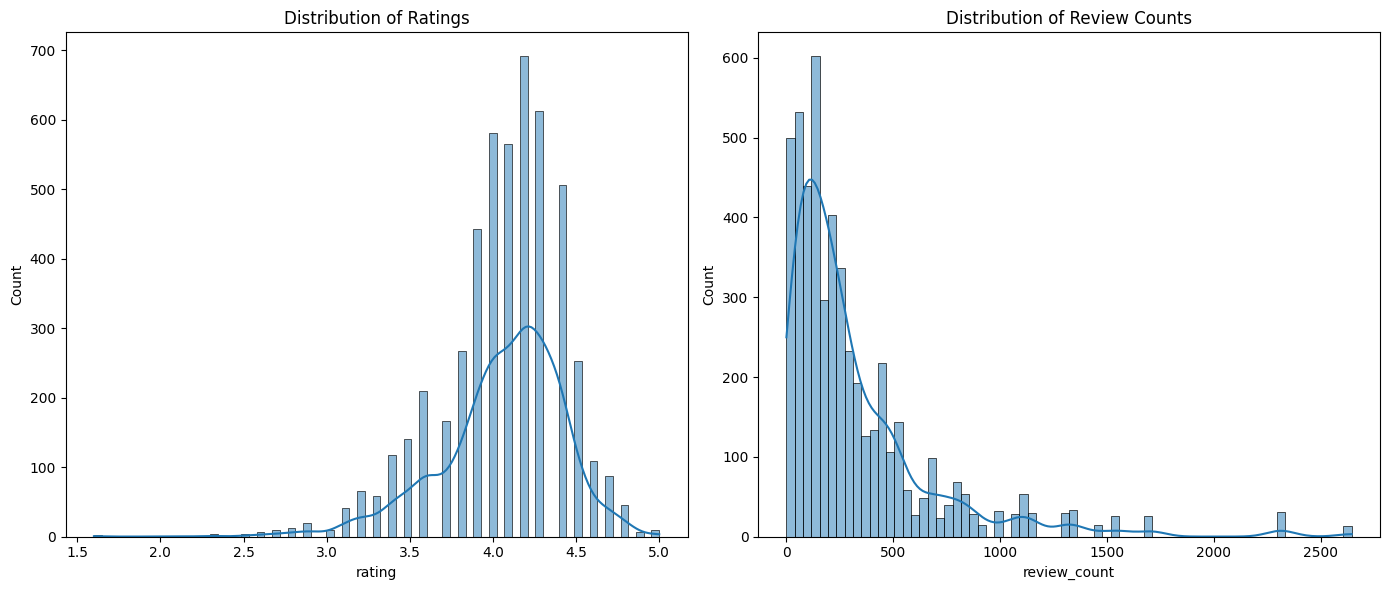

In [18]:
#Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship 
#you discoved through this visualization.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Filter out rows without review data (assuming review_count and rating are the columns)
reviewed_df = merged_df.dropna(subset=['review_count', 'rating'])

# Convert review_count and rating to numeric types if they are not already
reviewed_df['review_count'] = pd.to_numeric(reviewed_df['review_count'], errors='coerce')
reviewed_df['rating'] = pd.to_numeric(reviewed_df['rating'], errors='coerce')

# Plot histogram for ratings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(reviewed_df['rating'].dropna(), kde=True)
plt.title('Distribution of Ratings')

# Plot histogram for review count
plt.subplot(1, 2, 2)
sns.histplot(reviewed_df['review_count'].dropna(), kde=True)
plt.title('Distribution of Review Counts')

plt.tight_layout()
plt.show()



In [19]:
#Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - 
#make sure to create your database in your project's data/ directory!)
import sqlite3
import pandas as pd
import os

# Define the paths to your CSV files and the folder for the database
bike_stations_path = "Bike_stations.csv"
merged_restaurants_path = "merged_restaurants.csv"
database_folder = "data"

# Ensure the database folder exists
if not os.path.exists(database_folder):
    os.makedirs(database_folder)

# Path for the SQLite database inside the folder
database_path = os.path.join(database_folder, 'bikes_restaurants.db')

# Read the CSV files into DataFrames
bike_stations_df = pd.read_csv(bike_stations_path)
merged_restaurants_df = pd.read_csv(merged_restaurants_path)

# Connect to the SQLite3 database (or create it if it doesn't exist)
conn = sqlite3.connect(database_path)
c = conn.cursor()

# Create tables
c.execute('''
CREATE TABLE IF NOT EXISTS bike_stations (
    station_id INTEGER PRIMARY KEY AUTOINCREMENT,
    station_name TEXT,
    station_latitude REAL,
    station_longitude REAL
)
''')

c.execute('''
CREATE TABLE IF NOT EXISTS restaurants (
    restaurant_id INTEGER PRIMARY KEY AUTOINCREMENT,
    business_name TEXT,
    review_count INTEGER,
    rating REAL,
    categories TEXT,
    price TEXT,
    phone TEXT,
    distance REAL,
    address TEXT,
    source TEXT,
    station_name TEXT,
    FOREIGN KEY (station_name) REFERENCES bike_stations (station_name)
)
''')

# Insert data into bike_stations table
bike_stations_df.to_sql('bike_stations', conn, if_exists='replace', index=False)

# Insert data into restaurants table
merged_restaurants_df.to_sql('restaurants', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Data has been successfully inserted into the SQLite3 database in the 'data' folder.")


Data has been successfully inserted into the SQLite3 database in the 'data' folder.


In [ ]:
#Look at the data before and after the join to validate your data.